# Final Project: Clustering Uber Data

#### Author: Gitanjali

## Data Analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv("uber-raw-data-apr14.csv")

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
#modifying the data to make plots
#separate date and time
data["Date"] = pd.to_datetime(data['Date/Time']).dt.date 
data["Time"] = pd.to_datetime(data['Date/Time']).dt.time
data['Weekday'] = pd.to_datetime(data['Date/Time']).dt.dayofweek #useful for heatmap
data['Hour'] = pd.to_datetime(data['Date/Time']).dt.hour #useful for heatmap
data.drop("Base", 1) #remove base feature
data.head()

,Date/Time,Lat,Lon,Base,Date,Time,Weekday,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,1,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot of Uber Ride Pickups NYC')

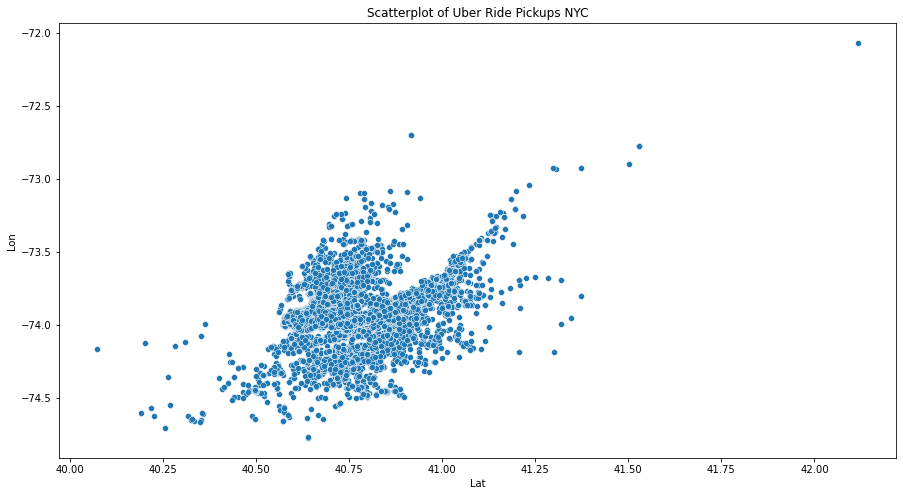

In [8]:
#create a scatterplot using seaborn to visualize data
plt.figure(figsize = (15,8))
x = data["Lat"]
y = data["Lon"]
sns.scatterplot(x, y)
plt.title("Scatterplot of Uber Ride Pickups NYC")

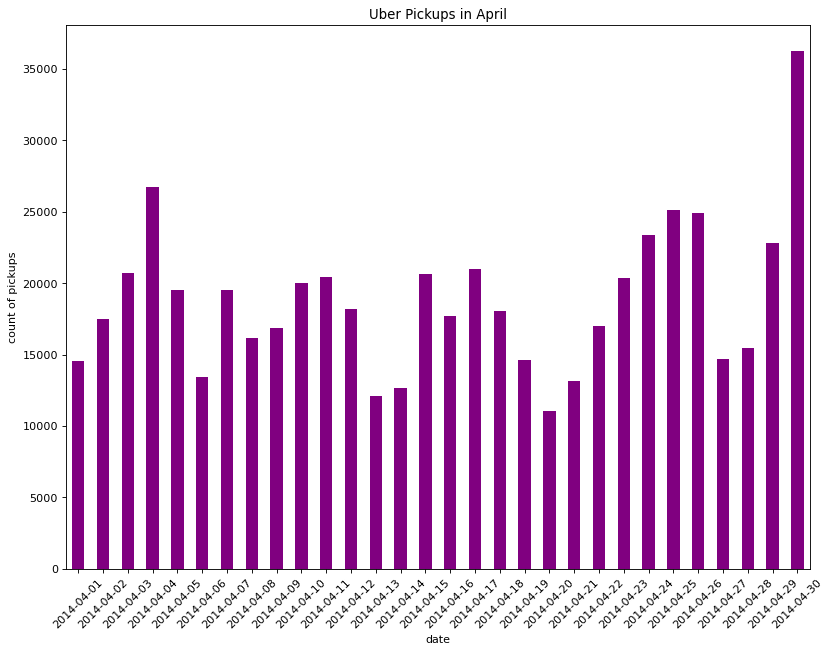

In [15]:
#Bar graph with number of pickups per day/
date_array = data['Date']
figure(figsize=(12, 9), dpi=80)
date_array.value_counts().sort_index().plot(kind='bar', rot=0, title = "Uber Pickups in April",ylabel='count of pickups', xlabel = "date", color = "purple")
plt.xticks(rotation = 45) 
plt.savefig("Uber_Pickups_Bar")
plt.show()

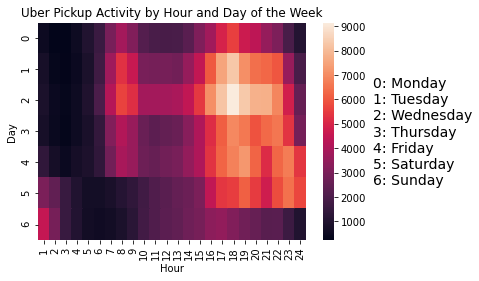

In [9]:
#Heatmap of Uber pickup activity by hour and day of the week
df = pd.DataFrame(data["Weekday"], data["Hour"])
weekday = data['Weekday'].to_numpy()
hour = data['Hour'].to_numpy()
#use pivot table to count the number of pickups depending on the hour and the day
df = df.pivot_table(index = weekday, columns = hour, aggfunc=np.count_nonzero).reset_index().fillna(0).astype(int)
df = df.drop(df.columns[[0]], axis=1)
df.columns = pd.Index(np.arange(1,len(df.columns)+1).astype(str)) #replace x-axis with numbers

res = sns.heatmap(df)
plt.xlabel('Hour')
plt.ylabel('Day')
textstr = '\n'.join((
    "0: Monday",
    "1: Tuesday",
    "2: Wednesday",
    "3: Thursday",
    "4: Friday",
    "5: Saturday",
    "6: Sunday"
    ))
plt.text(0.9,0.5, textstr,  fontsize=14,
         verticalalignment='center',transform=plt.gcf().transFigure)
plt.title("Uber Pickup Activity by Hour and Day of the Week")
plt.show()

In [24]:
"""
It seems as though the most amount of pickups is hours 17-21 on all days of the week except Monday and Sunday
The least amount of pickups are in the early hours during the week.
"""

'\nIt seems as though the most amount of pickups is hours 17-21 on all days of the week except Monday and Sunday\nThe least amount of pickups are in the early hours during the week.\n'

In [ ]:
#use folium to map the scatterplot on a NYC map
!pip install folium

In [26]:
import folium
#nyc_long = data["Lon"].values[0]
#nyc_lat = data["Lat"].values[0]

center_lat = data["Lat"].mean()
center_long = data["Lon"].mean()

#center the map
nyc_map = folium.Map(location=[center_lat, center_long], tiles="Stamen Terrain",zoom_start=10)

for idx, row in data.iterrows(): #iterate over date/time looking for /'unique data
    folium.CircleMarker(location=[row['Lat'], row['Lon']], radius=0.1, fill="yellow", color="red").add_to(nyc_map)

nyc_map.save("map1px.html")

## K-Means Clustering

In [11]:
#KMeans Clustering
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
     -------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

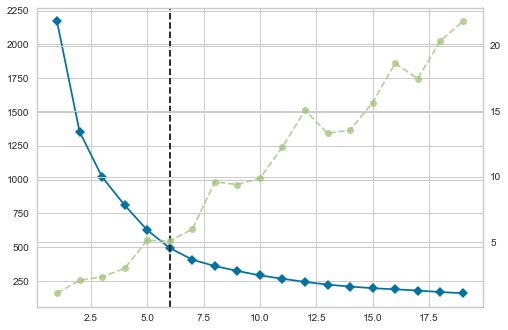

In [52]:
df2 = pd.DataFrame(data, columns = ["Lat", "Lon"])
#find what the value of k is
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,20)).fit(df2)
#visualizer.save("KElbow.jpg")

In [53]:
#using KElbow, we get k = 6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(df2)
print(kmeans.labels_)
print(kmeans.inertia_)
#gives within-cluster sum of squares. This is a total of the within-cluster sum of squares for all clusters.
print(kmeans.n_iter_)
#number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
#since we have k = 6, we should have 6 clusters and get 6 locations
#Counter will count the 6 different clusters
Counter(kmeans.labels_)

[3 0 0 ... 0 2 2]
494.8102276918079
18


Counter({3: 216794, 0: 249352, 1: 14419, 2: 59942, 4: 4857, 5: 19152})

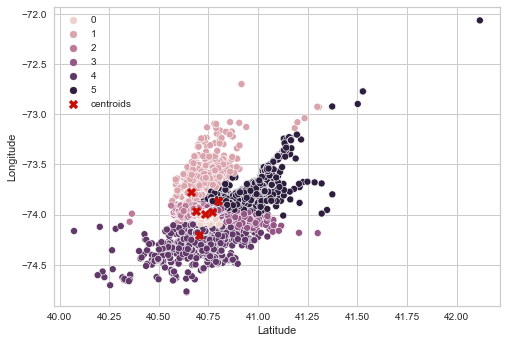

In [55]:
#plot kmeans with scatterplot and centroid locations
Counter(kmeans.labels_)
x="Lat"
y="Lon"
sns.scatterplot(data=df2, x="Lat", y="Lon", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

## DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
"""
DBSCAN Characteristics:
- Does not require number of clusters as input, unlike K-means
- Can detect outliers while finding clusters
- Can detect clusters that are complex
Epsilon value (eps) is the radius of the circle around the data point such that all other data points
that fall inside the circle are considered as neighborhood points. Points outside the circle may be considered outliers

"""

'\nDBSCAN Characteristics:\n- Does not require number of clusters as input, unlike K-means\n- Can detect outliers while finding clusters\n- Can detect clusters that are complex\nEpsilon value (eps) is the radius of the circle around the data point such that all other data points\nthat fall inside the circle are considered as neighborhood points. Points outside the circle may be considered outliers\n\n'

In [11]:
#eps is 2km but divide by 6371 to convert to radians
#There is a memory error if I try to run the whole data, so instead we will be using 10% of the data randomly split
# using train_test_split
df3 = pd.DataFrame(data, columns = ["Lat", "Lon"]).values
df3_1, df3_2 = train_test_split(df3, test_size = 0.9)

eps = 2/6371.
ms = 50
db = DBSCAN(eps=eps, min_samples=ms, algorithm='ball_tree', metric='haversine').fit(np.radians(df3_1))
#the ball tree algorithm and haversine metric were useful to prevent memory error

Number of Clusters:  4


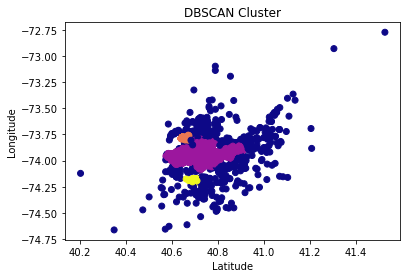

In [12]:
labels = db.labels_
print("Number of Clusters: ", len(np.unique(labels)))
# Plot the clusters
plt.scatter(df3_1[:, 0], df3_1[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Latitude") # X-axis label
plt.ylabel("Longitude") # Y-axis label
plt.title("DBSCAN Cluster")
plt.show() # showing the plot

[0.         0.         0.         ... 0.09858037 0.23808318 0.33271485]


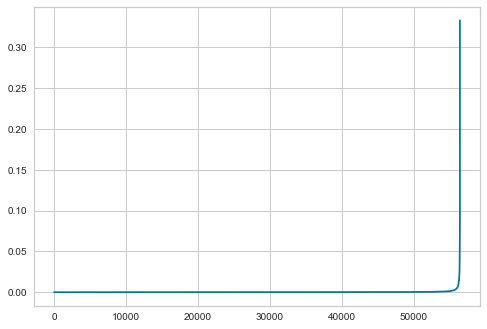

In [27]:
#can use nearest neighbor (knee method) to find ideal eps. Look for maximum curvature
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(df3_1)
distances, indices = nearest_neighbors.kneighbors(df3_1)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

In [ ]:
#using knee method, try eps = 0.1
eps = 0.1
ms = 50
db = DBSCAN(eps=eps, min_samples=ms, algorithm='ball_tree', metric='haversine').fit(np.radians(df3_1))

"""This crashed my pc"""

## OPTICS Clustering

In [13]:
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [14]:
#Similar to DBSCAN, memory error when using full data. Using 10% instead
df4 = pd.DataFrame(data, columns = ["Lat", "Lon"]).values
split_size = 0.9
df4_1, df4_2 = train_test_split(df4, test_size = split_size)
optics_clustering = OPTICS(min_samples=300, algorithm = "ball_tree", min_cluster_size = 300)
cluster_data = optics_clustering.fit(df4_1)

In [15]:
labels = cluster_data.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print("Number of Clusters: ", len(np.unique(labels)))

Estimated no. of clusters: 6
Estimated no. of noise points: 54057
Number of Clusters:  6


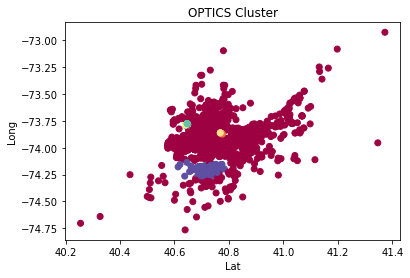

In [16]:
# Plot the clusters
from matplotlib import cm
cmap = plt.cm.Spectral
plt.scatter(df4_1[:, 0], df4_1[:,1], c = labels, cmap= cmap) # plotting the clusters
plt.xlabel("Lat") # X-axis label
plt.ylabel("Long") # Y-axis label
plt.title("OPTICS Cluster")
plt.show() # showing the plot

In [17]:
'''
Some potential solutions for the memory error is to use Standard Scaler and normalize to normalize the data into values between
0 and 1. This will help reduce the amount of computing power required. However, I am not sure how to plot coordinates after
scaling them down.
Another method to plot OPTICS is to use gridspec, but the plot did not look accurate, so I used matplotlib instead.
I used high min_samples and min_cluster_size to reduce the number of clusters
'''

'\nSome potential solutions for the memory error is to use Standard Scaler and normalize to normalize the data into values between\n0 and 1. This will help reduce the amount of computing power required. However, I am not sure how to plot coordinates after\nscaling them down.\nAnother method to plot OPTICS is to use gridspec, but the plot did not look accurate, so I used matplotlib instead.\nI used high min_samples and min_cluster_size to reduce the number of clusters\n'